Downloading dataset from kaggle through API key

In [15]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [16]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Resume_Screening/Kaggle"

In [17]:
%cd /content/gdrive/MyDrive/Resume_Screening/Kaggle

/content/gdrive/MyDrive/Resume_Screening/Kaggle


In [18]:
!ls

Resumes  UpdatedResumeDataSet.csv


Importing Libraries

In [19]:
import numpy as np
import pandas as pd

# **Dataset**

In [21]:
data = pd.read_csv('UpdatedResumeDataSet.csv',encoding='utf-8')
data['Cleaned_Resume'] = ''
data

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",
...,...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...,
958,Testing,â Willingness to accept the challenges. â ...,
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne...",
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...,


In [22]:
print("Resume Categories : ")
print(data['Category'].value_counts())

Resume Categories : 
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Operations Manager           40
Blockchain                   40
Mechanical Engineer          40
Sales                        40
ETL Developer                40
Data Science                 40
Arts                         36
Database                     33
Electrical Engineering       30
PMO                          30
Health and fitness           30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: Category, dtype: int64


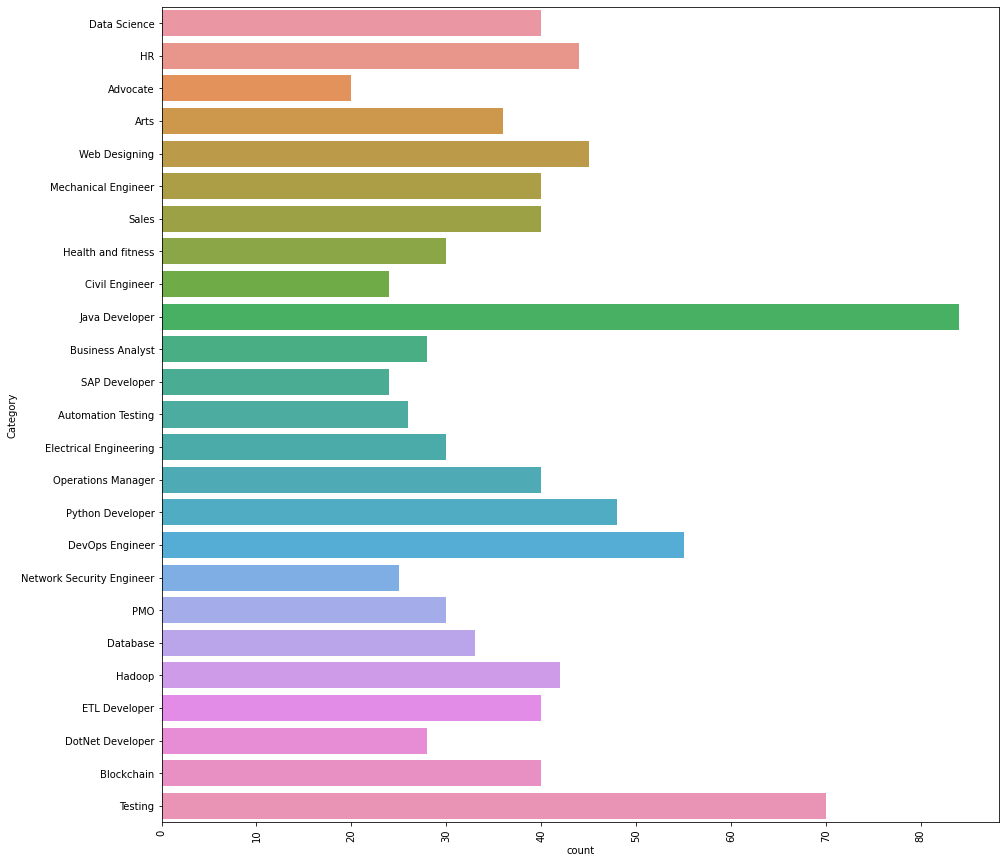

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.xticks(rotation=90)
sns.countplot(y="Category", data=data)

# **Cleaning the dataset**

In [24]:
import re

def cleaned_data(resume_data):
    #removing all URLs.
    resume_data = re.sub('http\S+\s*', ' ', resume_data)
    #removing RT and cc.
    resume_data = re.sub('RT|cc', ' ', resume_data)
    #removing hashtags
    resume_data = re.sub('#\S+', '', resume_data)
    #removing mentions
    resume_data = re.sub('@\S+', '  ', resume_data)
    #removing punctuations
    resume_data = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', resume_data)
    #removing all non-ASCII values.
    resume_data = re.sub(r'[^\x00-\x7f]',r' ', resume_data)
    #removing extra whitespaces
    resume_data = re.sub('\s+', ' ', resume_data) 
    return resume_data

In [25]:
for i,resume in enumerate(data['Resume']):
  data['Cleaned_Resume'][i] = cleaned_data(resume)

Cleaned Data

In [26]:
data.head()

,Category,Resume,Cleaned_Resume
0,Data Science,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas num...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...
2,Data Science,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control System...
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Haryan...


In [27]:
print("Length of dataset :",len(data))

Length of dataset : 962


# **Information regarding Dataset**

In [28]:
#getting the complete text from the dataset.
corpus = ""
for i in range(0,len(data)):
  corpus = corpus + data['Cleaned_Resume'][i].lower()

In [ ]:
corpus[0:1000]

In [30]:
import nltk
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

In [31]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [32]:
#creating the tokenizer.
tokenizer = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizer.tokenize(corpus)
print("Total number of tokens :", len(tokens))

Total number of tokens : 411913


In [33]:
#getting the stop words from nltk dataset.
stopwords = nltk.corpus.stopwords.words('english')
print("Total number of stopwords :", len(stopwords))

Total number of stopwords : 179


In [34]:
#removing the stop words from the tokens.
words = []
for token in tokens:
    if token not in stopwords:
        words.append(token)

print("Total number of words after removal of stopwords :", len(words))

Total number of words after removal of stopwords : 318305


# **Lemmatization**

In [35]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [36]:
from nltk.stem import WordNetLemmatizer 

lemmatizer = WordNetLemmatizer() 
lemmatized_words = []
for word in words : 
  word = lemmatizer.lemmatize(word)
  lemmatized_words.append(word)

print("Total number of lemmatized words :", len(lemmatized_words))

Total number of lemmatized words : 318305


In [37]:
frequency_distribution = nltk.FreqDist(lemmatized_words)
common_words = frequency_distribution.most_common(10)
print("Top 10 common words : ")
print(common_words)

Top 10 common words : 
[('project', 4071), ('exprience', 3829), ('company', 3635), ('month', 3344), ('detail', 3132), ('description', 3122), ('team', 2159), ('data', 2138), ('1', 2134), ('management', 2024)]


# **Frequency Distribution**

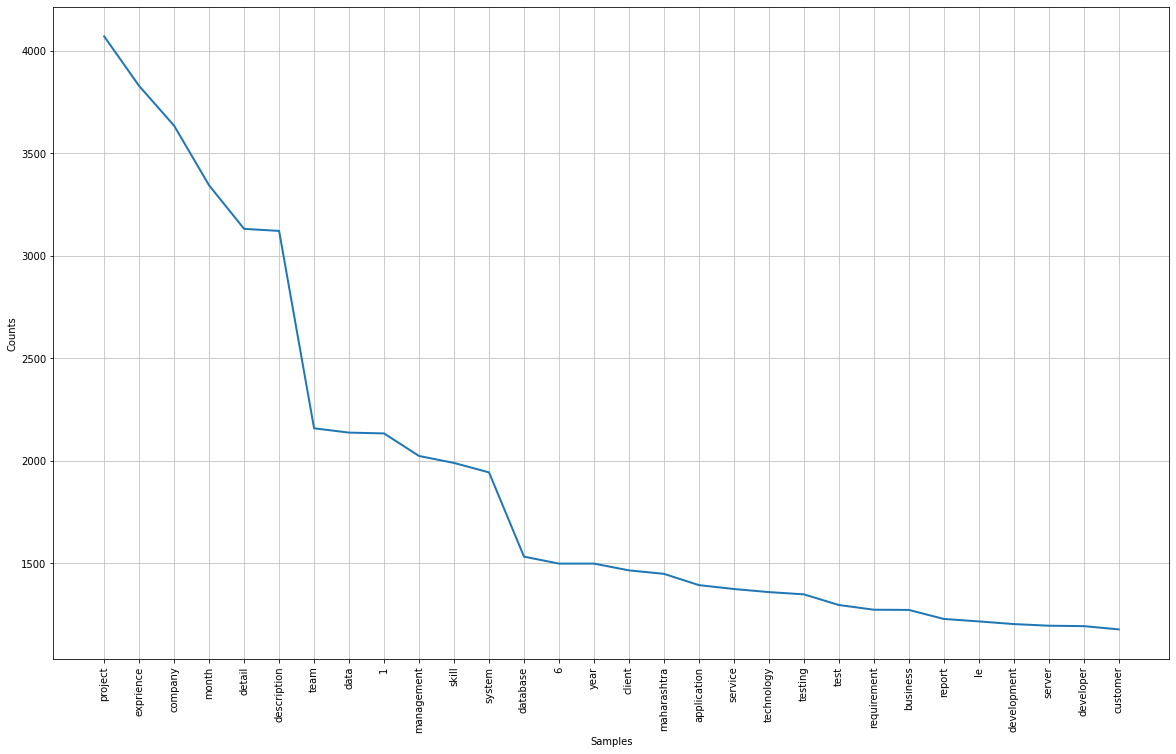

In [38]:
#Frequency Distribution Plot
plt.subplots(figsize=(20,12))
frequency_distribution.plot(30)

# **WordCloud**

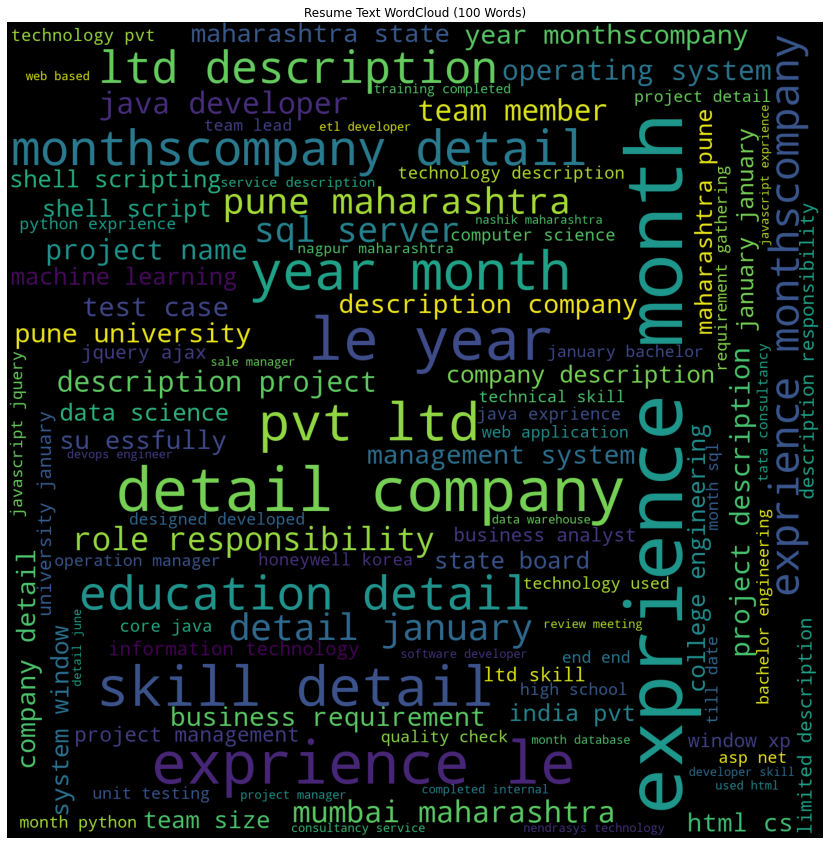

In [73]:
#converting into string
string = ' '.join([i for i in lemmatized_words if not i.isdigit()])
plt.subplots(figsize=(15,15))
wordcloud = WordCloud(background_color = 'black', max_words = 100, width = 1500, height = 1500).generate(string)
plt.imshow(wordcloud)
plt.title('Resume Text WordCloud (100 Words)')
plt.axis('off')
plt.show()

**Encoding the labels under "Category"**

In [74]:
from sklearn import preprocessing
import copy
#label encoder
le = preprocessing.LabelEncoder()
temp = copy.deepcopy(data['Category'])
le.fit(temp)
categories = le.classes_
#converting the categorical data into labels.
data['Category'] = le.transform(temp)

In [75]:
categories

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

**Getting the training and testing data**

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
#getting the resume text and categories from data.
X = data['Cleaned_Resume'].values
y = data['Category'].values
#using the TfidfVectorizer to transform the text into vector.
word_vectorizer = TfidfVectorizer(sublinear_tf = True, stop_words = 'english')
word_vectorizer.fit(X)
word_features = word_vectorizer.transform(X)
#splitting the dataset into training and test data.
X_train,X_test,y_train,y_test = train_test_split(word_features, y, random_state=0, test_size=0.2)
print("Shape of X-train : ",X_train.shape)
print("Shape of X-test : ",X_test.shape)

Shape of X-train :  (769, 7351)
Shape of X-test :  (193, 7351)


In [77]:
from sklearn import linear_model
from sklearn import metrics

# **Training the model**

In [44]:
#this estimator implements regularized linear models with stochastic gradient descent
model = linear_model.SGDClassifier(loss = 'log')
model.fit(X_train,y_train)
prediction = model.predict(X_test)

In [45]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X_train, y_train)

array([0.99350649, 0.99350649, 0.99350649, 1.        , 0.9869281 ])

In [ ]:
for i in prediction:
  print(categories[i])

**Converting Pdf file to text**

Using the model to classify the text based on "Category"

Given a folder with docx files, using the model to predict the category for each resume

In [59]:
directory = '/content/gdrive/MyDrive/Resume_Screening/Kaggle/Resumes'
filenames = []
# iterate over files in that directory.
for filename in os.listdir(directory):
  f = os.path.join(directory, filename)
  filenames.append(filename)

In [ ]:
filenames

In [61]:
!pip install python-docx

Converting the text in docx file to string

In [62]:
import docx

def getText(filename):
  doc = docx.Document(filename)
  fullText = []
  #getting the complete text from docx file
  for para in doc.paragraphs:
      fullText.append(para.text)
  return '\n'.join(fullText)

In [63]:
resumes = []
for i in filenames:
  new_directory = directory+'/'+i
  text = getText(new_directory)
  #appending the text to a list.
  resumes.append(text)

In [64]:
resumes[0]

"Anil Krishna Mogalaturthi\n681-888-2999\n\n\n\nProfessional Summary\nHighly inspired software professional with over 8 years of experience in all stages of systems development life cycle including business requirements gathering, design, data conversions, programming, system integration / user acceptance testing.\nSenior Java/J2EE Developer with around 8 years of experience in Systems Analysis, Design, Development and Implementation of Web and Client/Server and Enterprise Application development using Java and J2EE Technologies.\nStrong experience in all the phases of software development cycle (SDLC) including UI design, architecture, identification of corporate needs, user interaction, deployment, testing, documentation and maintenance.\nExtreme experience in architecting and deploying of fault tolerant, highly available, cost effective and secure servers in AWS and MS Azure.\nDeveloped Networking policies for Docker containers. Worked on open source development tools like Docker Co

Pre-processing the text data and using the model to predict the top 3 categories which the resume might belong to.

In [65]:
cleaned_resumes = []
new_resume_data = {}
pie_chart = {}
for count,resume in enumerate(resumes):
  #cleaning the resume text
  cleaned_resume = cleaned_data(resume)
  #appending the cleaned data to a list.
  cleaned_resumes.append(cleaned_resume) 
  #getting the feature vector for the cleaned text.
  word_features = word_vectorizer.transform([cleaned_resume])
  #getting the probabilities for each category.
  probabilities = model.predict_proba(word_features)
  #getting the top 3 predictions from the model(but they are encoded labels.)
  best_three = np.argsort(probabilities, axis=1)[:,-3:]

  #storing the required data.
  best_three_list = []
  for i in best_three:
    #converting the encoded labels to the actual labels.
    best_three_list.append(categories[i])
    if categories[i][0] in pie_chart:
      pie_chart[categories[i][0]] += 1
    else : 
      pie_chart[categories[i][0]] = 1

  new_resume_data[count] = (best_three_list, resume, filenames[count])

# **Visualising the distribution of categories**

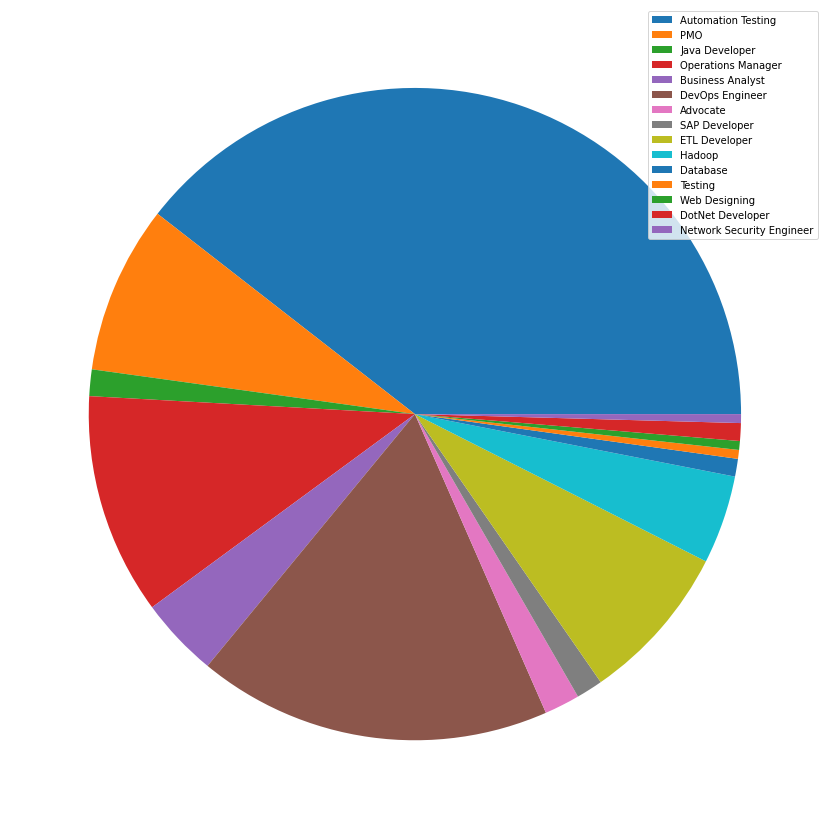

In [66]:
plt.figure(figsize=(15,15))
plt.pie(pie_chart.values())
plt.legend(labels = pie_chart.keys())
plt.show()

# **All categories**

In [67]:
for i in range(len(categories)):
  print(str(i) + ". " + categories[i])

0. Advocate
1. Arts
2. Automation Testing
3. Blockchain
4. Business Analyst
5. Civil Engineer
6. Data Science
7. Database
8. DevOps Engineer
9. DotNet Developer
10. ETL Developer
11. Electrical Engineering
12. HR
13. Hadoop
14. Health and fitness
15. Java Developer
16. Mechanical Engineer
17. Network Security Engineer
18. Operations Manager
19. PMO
20. Python Developer
21. SAP Developer
22. Sales
23. Testing
24. Web Designing


# **Category Input**

In [ ]:
category_numbers = list(map(int, input("Enter category numbers (upto : 3): ").split()))

In [ ]:
category_numbers

In [ ]:
requested_data = {}
requested_categories = []

for i in category_numbers :
  requested_categories.append(categories[i])

required = len(requested_categories)
while required > 1 : 
  print("Resumes with ",str(required), " requested categories.")
  for i in range(0,len(new_resume_data)):
    count = 0
    for category_list in new_resume_data[i][0]:
      for cat in category_list:
        if cat in requested_categories: 
          count += 1

    if count == required:
      print("\tSkills : ", new_resume_data[i][0])
      print("\tFile name : ", new_resume_data[i][2])
      # print("\tResume : ", new_resume_data[i][1])
      print("\n")
  required -= 1
  print("----------------------------------------")
  

# **Saving the model**

In [69]:
import pickle

In [70]:
%cd /content/gdrive/MyDrive/Resume_Screening/

/content/gdrive/MyDrive/Resume_Screening


In [71]:
with open('model.pkl','wb') as f:
    pickle.dump(model,f)